# 1. FIFA 데이터로 머신러닝 입문
- [출처 : Dacon_ML_FIFA_tutoral (1)](https://dacon.io/edu_tutorial/143821)
- [Seaborn API](https://seaborn.pydata.org/api.html)
- [Seaborn Color](https://python-graph-gallery.com/100-calling-a-color-with-seaborn/)
- [Pandas tutorial](https://riptutorial.com/ko/pandas/topic/796/%ED%8C%AC%EB%8D%94-%EC%8B%9C%EC%9E%91%ED%95%98%EA%B8%B0)

## 데이터와 라이브러리 불러오기

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

font_fname = 'C:/Windows/Fonts/NanumGothic.ttf'  # 원하는 폰트 
font_family = fm.FontProperties(fname=font_fname).get_name()
plt.rcParams['font.family'] = font_family

%matplotlib inline 
mpl.rc('axes', unicode_minus=False)        # 마이너스('-') 폰트 깨지는 문제에 대한 대처
plt.style.use('ggplot')

- pandas(판다스) : pandas는 dataframe 형식으로 데이터를 변환하여 분석을 편리하게 도와주는 라이브러리입니다.	pandas Article
- numpy(넘파이) :	numpy는 행령 연산을 편리하게 도와주는 라이브러리입니다.	numpy article
- matplotlib(매트플롯라이브러리) :	matplotlib는 그래프를 그릴 수 있게 도와주는 라이브러리입니다.	matplotlib article
- seaborn(씨본) : seaborn은 matplotlib를 기반으로하여 다양한 색상과 차트의 기능이 추가된 라이브러리입니다.	seaborn article
- sklearn(==scikit-learn, 싸이킷런) : sklearn은 기계학습을 사용하기 유용한 라이브러리입니다.	sklearn article
- 랜덤포레스트는 여러개의 의사결정나무를 사용하는 머신러닝 알고리즘(모델)입니다. 랜덤포레스트를 회귀분석으로 사용하기 위해서는 아래와 같이 sklearn의 ensemble에서 RandomForestRegressor를 불러와야합니다.
    `from sklearn.ensemble import RandomForestRegressor`
- os : os는 운영체제(Operating System)에서 제공되는 기본적인 기능들을 제공하는 라이브러리입니다.

In [6]:
import os
# os.chdir('데이터가 있는 폴더위치')
fifa_train = pd.read_csv("data/FIFA_train.csv")  # 데이터 불러오기 

## 탐색적 데이터 분석 : EDA(Exploratory Data Analysis)

- `pd.DataFrame.shape`
    - shape은 데이터의 형태를 확인하기위해서 사용됩니다. pandas의 DataFrame 타입의 함수로서 사용되며 (행, 열)을 반환합니다.
- `pd.DataFrame.head`
    - head는 데이터를 위에서부터 확인하고자 할때 사용합니다. head()안에 아무것도 없으면 상위 5개의 행만 불러옵니다. 만약 상위 n개의 행을 불러오고 싶으시다면 head()안에 불러오고자 하는 행의 개수를 입력합니다.
    
pandas의 더 많은 데이터의 형태 또는 크기를 확인하는 방법을 알고싶으시다면 [여기](https://dacon.io/index.php?mid=user1&page=1&document_srl=158025)에서 확인해주세요.

### 데이터 설명

1. id : 선수 고유의 아이디
2. name : 이름
3. age : 나이
4. continent : 선수들의 국적이 포함되어 있는 대륙입니다
5. contract_until : 선수의 계약기간이 언제까지인지 나타내어 줍니다
6. position : 선수가 선호하는 포지션입니다. ex) 공격수, 수비수 등
7. prefer_foot : 선수가 선호하는 발입니다. ex) 오른발
8. reputation : 선수가 유명한 정도입니다. ex) 높은 수치일 수록 유명한 선수
9. stat_overall : 선수의 현재 능력치 입니다.
10. stat_potential : 선수가 경험 및 노력을 통해 발전할 수 있는 정도입니다.
11. stat_skill_moves : 선수의 개인기 능력치 입니다.
12. value : FIFA가 선정한 선수의 이적 시장 가격 (단위 : 유로) 입니다.

### 데이터 확인

In [8]:
fifa_train.shape # 행, 열 

(8932, 12)

In [53]:
fifa_train.sort_values(by='value', ascending=False).head() # 상위 5개 데이터프레임 

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,L. Messi,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0
2,7,L. Suárez,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0
17,30,Isco,26,europe,2022,ST,right,3.0,88,91,4.0,73500000.0
1,3,De Gea,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0
14,26,M. Salah,26,africa,2023,MF,left,3.0,88,89,4.0,69500000.0


### 시각화

시각화(visualization)는 왜 하는 것일까?

- 데이터 분석은 패턴을 찾는 것이 핵심입니다.  
    ex) 어떤 특징을 가진 선수가 이적료가 높은지? 낮은지?
- 이러한 패턴을 가장 쉽게 눈으로 확인할 수 있는 방법 중 하나가 바로 시각화입니다.  
<br>

- `plt.style.use('스타일이름')`
    - plt 는 matplotlib.pyplot의 약어로 지정했었습니다. plt의 style을 사용하고자 한다면 아래와 같이 plt.style을 입력합니다. 여기에 추가로 style의 기능을 사용하고자 한다면 use라는 style의 함수를 사용합니다.
    - 원하는 스타일을 사용하고 싶은경우 plt.style.use()안에 스타일이름을 입력합니다.
    - 입력된 스타일는 실행된 라인 이후부터 모든 matplotlib 기반의 그래프에서 적용됩니다.
    - 참고 : matplotlib의 더 많은 스타일을 알고 싶으시다면 [여기](https://dacon.io/index.php?mid=user1&page=1&document_srl=157917)를 확인해 주세요.

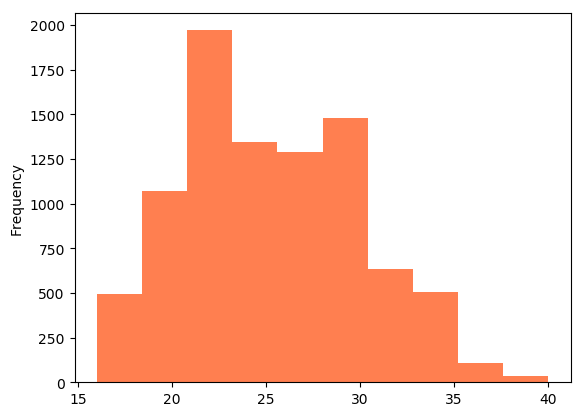

In [22]:
fifa_train['age'].plot.hist(color='coral') # 축구선수의 나이 분포 

Histogram(히스토그램)이란?

- Histogram은 얼마나 데이터가 퍼져있는지를 확인하기 좋은 시각화 방법 중 하나입니다. 
- 막대그래프와 비슷해보이지만 histogram은 구간을 나누어서 각 구간마다 얼마나 데이터가 들어있는지를 그래프로 나타낸 것입니다.
- histogram의 구간은 몇개로 할지 임의로 지정할 수 있습니다.
- 또한 히스토그램은 `연속형 자료`에 사용합니다
- 범주형 변수에대한 분포는 씨본의 `countpolt`를 통해 확인할 수 있습니다.

히스토그램을 통해 알 수 있는 것 

- 데이터의 분포(distribution)가 어느정도 인가?
- 데이터가 어느쪽에 쏠려있는가?
- 봉우리가 몇개인가?

위의 히스토그램은 

- 축구 선수들의 나이는 대체로 20대 초반에 많이 몰려있는 형태로, 야구 선수이 비해 비교적 선수들의 나이가 어린편이다. 
- 축구라는 스포츠의 특성상 피지컬을 중요시하기 때문에 몸상태가 좋은 20대 초반의 선수들이 많이 있는 것을 알 수 있습니다.

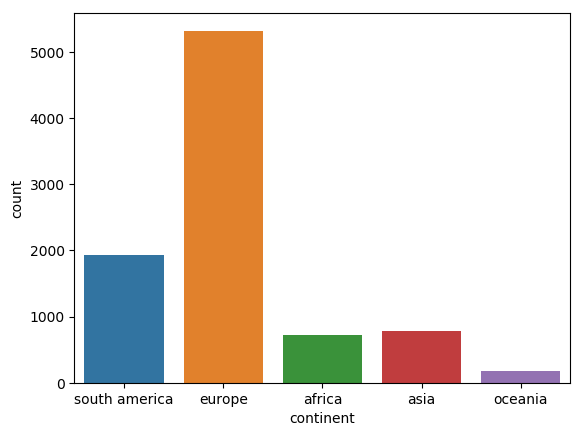

In [23]:
sns.countplot(fifa_train['continent'])  # 축구선수의 출신 대륙 분포 

seaborn.countplot(범주형자료)

- `countplot`은 **범주형 자료**에 존재하는 범주별 개수가 몇개인지 카운팅해주고 막대그래프로 만들어주는 seaborn의 기능입니다.
- continent(대륙)변수가 각 범주별로 몇개씩 있는지 확인하기 위해서는 countplot안에 fifa_train의 continent(대륙)를 따로 뽑아내어 fifa_train['continent']와 같이 입력합니다.
- seaborn.countplot에 대해 자세히 알고 싶으시다면 [여기](https://dacon.io/index.php?mid=user1&page=1&document_srl=157916)를 참고해주세요.  

위 그래프에서  알 수 있는 점은 
 
-  europe(유럽)에 속한 축구선수가 다른 continent(대륙)에 비해서 더 많이 있음을 알 수 있습니다.
- 두번째로 많은 south america(남미)도 europe(유럽)에 비해 절반도 안되는 것을 알 수 있습니다.
 
 

### 어떤 대륙이 이적료가 가장 비쌀까?

In [68]:
data = fifa_train.groupby(['continent']).value.mean() # 대륙별 이적료 평균 
data

continent
africa           2.972247e+06
asia             1.035146e+06
europe           2.928125e+06
oceania          8.225429e+05
south america    3.183204e+06
Name: value, dtype: float64

In [69]:
data.index

Index(['africa', 'asia', 'europe', 'oceania', 'south america'], dtype='object', name='continent')

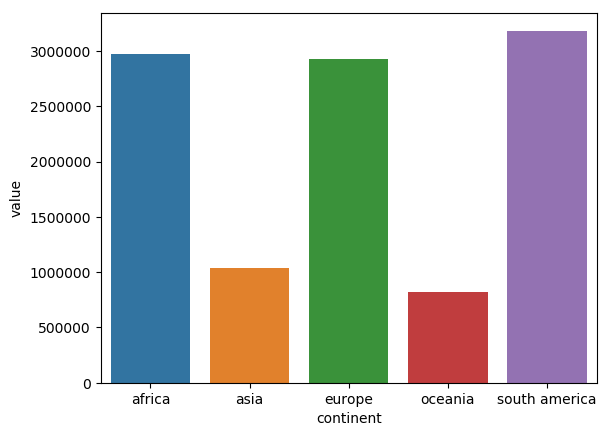

In [70]:
sns.barplot(x=data.index, y=data)

- pandas.groupby(범주형변수명).변수명.mean()
    - groupby는 그룹별 통계량을 볼 수 있도록 그룹화를 하는 pandas의 함수입니다.
    - 대륙별 선수들의 이적료 평균 값을 확인하고자 한다면 groupby안에 범주형 변수인 continent(대륙)를 입력하고 확인하고자하는 value(이적료)와 .mean()을 입력합니다.  
<br>
- pandas.DataFrame.round(n) or pandas.Series.round(n)

    - round는 pandas의 데이터프레인 또는 시리즈 형식에 사용할 수 있는 함수입니다. round 안에는 몇번째 소수점 자리에서 반올림 할지를 입력합니다.
    
그룹화에 대한 자세한 내용을 원하시면 [여기](https://dacon.io/index.php?mid=user1&page=1&document_srl=157913)를 참고해주세요.

- 대륙별로 비교했을때 south america(남미)가 선수 수는 두번째로 많았지만 평균 이적료가 가장 비싼 것을 알 수 있었습니다.
- 다음으로는 africa(아프리카) 그리고 europe(유럽) 이였습니다.
- asia(아시아)와 oceania(오세아니아) 대륙은 상위 3개의 대륙에 비해 이적료차이가 약 3배정도 나는 것을 알 수 있습니다.

### 선호하는 발의 비율은?

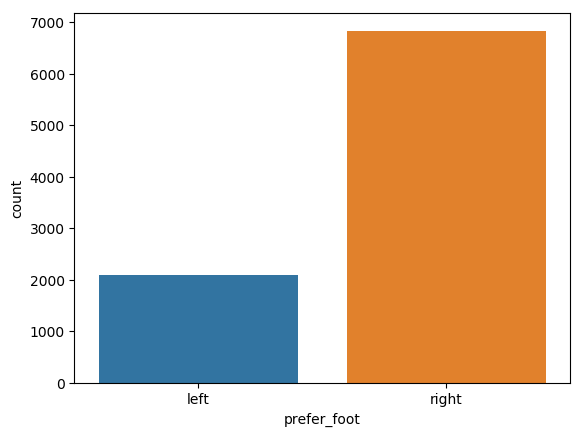

In [107]:
sns.countplot(fifa_train['prefer_foot'])

In [110]:
fifa_train['prefer_foot'].value_counts() / len(fifa_train) * 100

right    76.545007
left     23.454993
Name: prefer_foot, dtype: float64

- 축구선수의 76.54%는 오른발, 나머지는 왼발잡이 

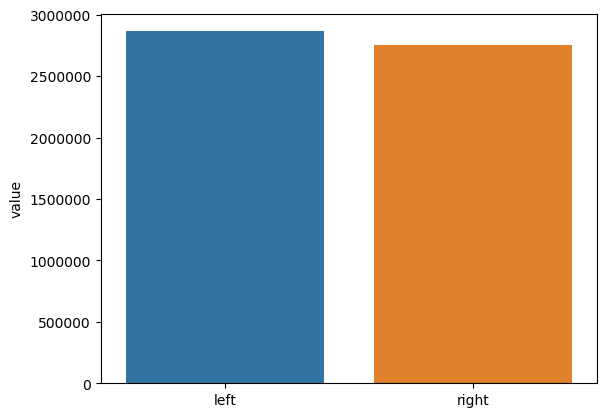

In [86]:
sns.barplot(x = fifa_train['prefer_foot'].unique(), y= fifa_train.groupby(['prefer_foot']).value.mean())

- 다만, 평균 이적료는 왼발을 사용하는 축구선수가 미세하게 높아보이나 통계적으로 유의미한지는 알 수 없음

### 포지션 확인 

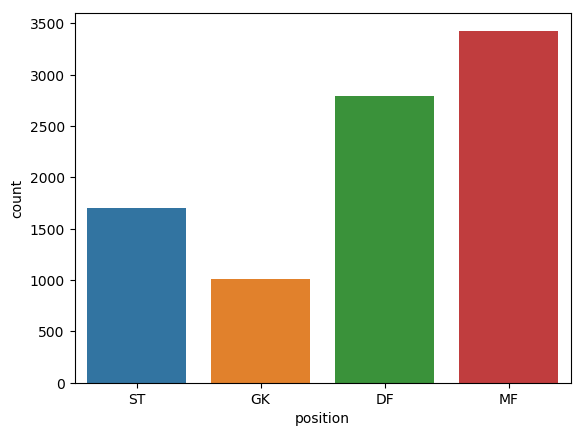

In [112]:
sns.countplot(fifa_train['position'])  # 포지션별 선수 수 

- position(포지션)은 'MF(미드필더)'의 이적료가 가장 비싼것을 알 수 있습니다.
- 다름으로는 DF(수비수), ST(공격수), GK(골키퍼) 순입니다.

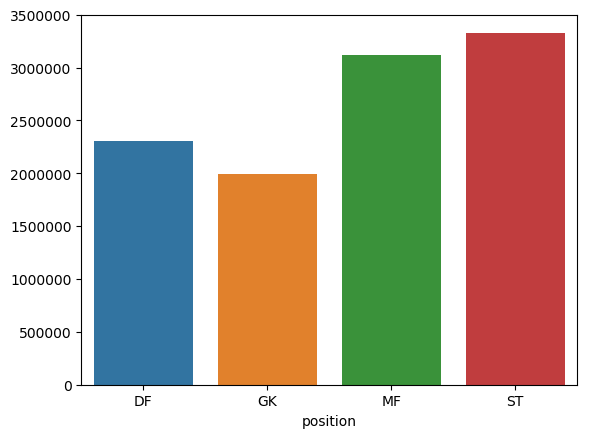

In [143]:
data2 = fifa_train.groupby(['position'])['value'].mean()
sns.barplot(x=data2.index, y=data2.values)

- ST(공격수)의 이적료가 가장 비싼것을 알 수 있습니다.
- 다음으로는 MF(미드필더), DG(수비수), GK(골키퍼) 순으로 이적료가 비쌉니다.

### 현재 능력치 및 잠재 능력치와 이적료의 관계 

- stat_overall : 연속형 변수 
- stat_potential : 연속형 변수 
- value : 연속형 변수 

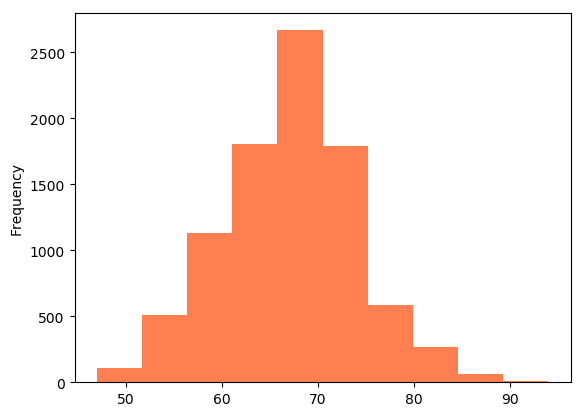

In [158]:
fifa_train['stat_overall'].plot.hist(color='coral') # 선수의 현재 능력치 분포 

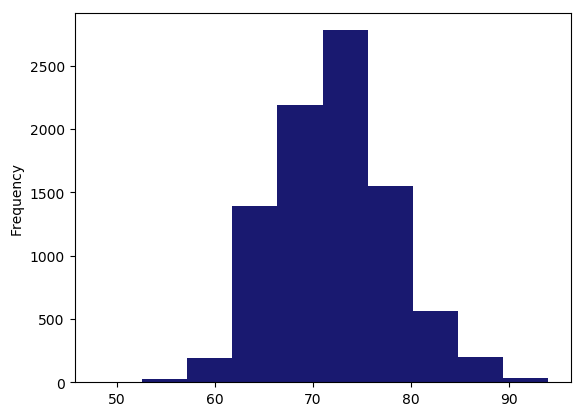

In [165]:
fifa_train['stat_potential'].plot.hist(color='midnightblue', linewidth=5)  # 선수들의 잠재 능력치 분포 

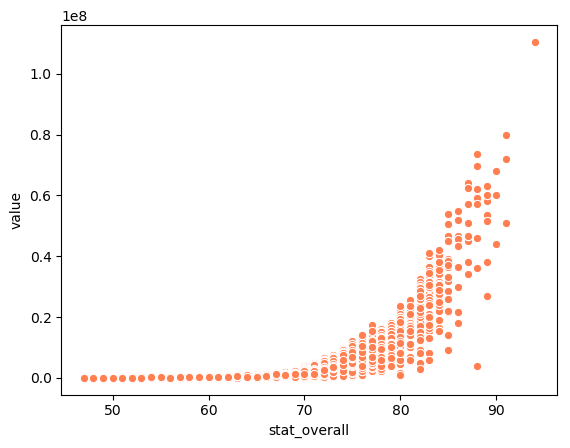

In [161]:
sns.scatterplot('stat_overall', 'value', data=fifa_train, color='coral')  # 현재 능력치와 이적료간의 관게 

stat_overall(현재능력치)에 따른 value(이적료)를 확인했을때 stat_overall(현재능력치)가 높을 수록 value(이적료)가 기하급수적으로 높아지는 것을 알 수 있습니다.

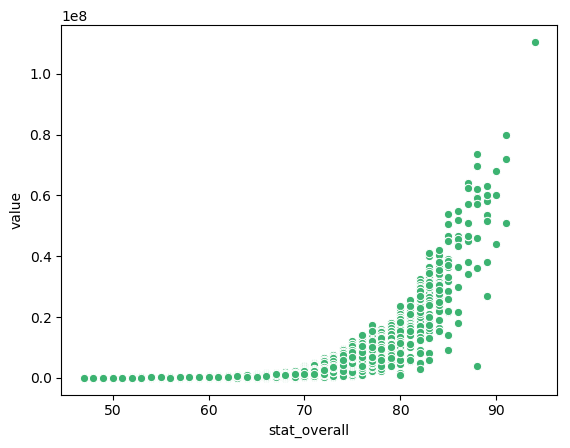

In [166]:
sns.scatterplot('stat_overall', 'value', data=fifa_train, color='mediumseagreen')  # 현재 능력치와 이적료간의 관게 

stat_potential(잠재능력치)에 따른 value(이적료)를 확인했을때 stat_potential(잠재능력치)가 높을 수록 value(이적료)가 기하급수적으로 높아지는 것을 알 수 있습니다.

### 나이대별 가격

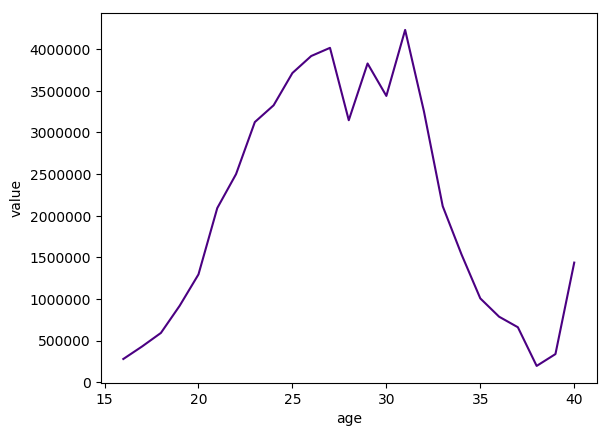

In [182]:
sns.lineplot(x='age', y='value', data=fifa_train, color='indigo', ci=None)

- age(나이)는 numeric(숫자형)이긴 하지만 정수형태로 되어있기 때문에 scatter plot(산점도)를 통해 확인하기 보다는 각 나이대별 평균값을 line plot(선그래프)를 통해서 확인하는 것이 더 좋은 방법입니다.
- age(나이)별 평균 value(이적료)는 20대 초반부터 점점 올라가다가 20대 중후반과 30대 초반이 가장 비싼 것을 알 수 있습니다.
- 30대 초반 이후부터는 value(이적료)가 급격치 떨어짐을 알 수 있습니다.

### 계약 기간 변수 변환

In [184]:
fifa_train['contract_until'].unique() # 계약 연도만 따로 나태내고 싶다. 

array(['2021', '2020', '2019', '2023', '2022', '2024', 'Jun 30, 2019',
       '2026', 'Dec 31, 2018', '2018', '2025', 'Jun 30, 2020',
       'May 31, 2020', 'May 31, 2019', 'Jan 31, 2019', 'Jan 1, 2019',
       'Jan 12, 2019'], dtype=object)

In [205]:
fifa_train['contract_year'] = fifa_train['contract_until'].str[-4:].astype('int32') # str.slice(4, )  맨 뒤의 4자리만 가져오고 이를 숫자형으로 변환 
print(type(fifa_train['contract_year'][0]))

<class 'numpy.int32'>


In [207]:
fifa_train.groupby(['contract_year']).value.mean()

contract_year
2018    1.286407e+06
2019    1.746123e+06
2020    2.397036e+06
2021    2.827543e+06
2022    5.899074e+06
2023    5.802115e+06
2024    2.450833e+07
2025    1.405333e+07
2026    5.050000e+07
Name: value, dtype: float64

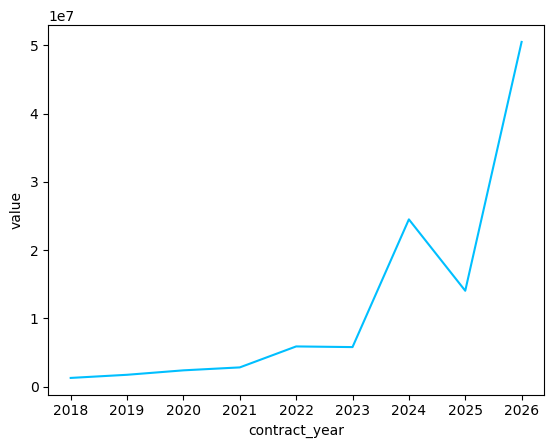

In [208]:
sns.lineplot(x='contract_year', y='value', data=fifa_train, color='deepskyblue', ci=None)

- 연도별 value(이적료) 차이를 보았을 때 계약기간이 늘어날수록 value(이적료)가 비싸다는 것을 알 수 있습니다.
- 계약기간이 2024년에 value(이적료)가 급상승했다가, 2025년에 다시 떨어집니다.
- 이후 2026년에 value(이적료)는 다시 급상승합니다.